_Run the first 2 code cells without modifications_

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from IPython.display import Markdown, Image
# for presentations:
#display(HTML("<style>.container { width:100% !important; }</style>"))

import numpy as np
import pandas as pd
#pd.set_option("display.max_colwidth", 200)
import matplotlib as mpl
from matplotlib import pyplot as plt
plt.ion()
plt.style.use('seaborn-v0_8-muted')
from pprint import pprint as ptp

import sys
from pathlib import Path
print('Python ver: {}\nPython env: {}'.format(sys.version, Path(sys.prefix).name))
print('Currrent dir: {}\n'.format(Path.cwd()))


def add_to_sys_path(this_path, up=False):
    """
    Prepend this_path to sys.path.
    If up=True, path refers to parent folder (1 level up).
    """

    if up:
        newp = str(Path(this_path).parent)
    else:
        newp = str(Path(this_path))
    if newp not in sys.path:
        sys.path.insert(1, newp)
        print('Path added to sys.path: {}'.format(newp))


def fdir(obj, start_with_str='_', exclude=True):
    """Filtered dir() for method discovery."""
    return [d for d in dir(obj) if not d.startswith(start_with_str) == exclude]

def despine(which=['top','right']):
    """which ([str])): 'left','top','right','bottom'."""

    ax = plt.gca()
    for side in which:
        ax.spines[side].set_visible(False)
    return

def md_width_comment(w:int=120) -> str:
    """Width guide for composing md documents."""
    return f"<!-- dotted line width = {w}\n{'.'*w}-->"


# autoreload extension
%load_ext autoreload
%autoreload 2

/tmp/ipykernel_2204/2669287891.py:9: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


Python ver: 3.11.8 | packaged by conda-forge | (main, Feb 16 2024, 20:53:32) [GCC 12.3.0]
Python env: mcbtest
Currrent dir: /home/cat/projects/MCCE_Benchmarking/notebooks



---
---

In [14]:
from mcce_benchmark import APP_NAME, BENCH, ENTRY_POINTS, SUB1, SUB2
from mcce_benchmark import N_BATCH, N_PDBS, OUT_FILES, ANALYZE_DIR, RUNS_DIR

from mcce_benchmark import USER_PRFX, USER_ENV, CONDA_PATH
from mcce_benchmark.io_utils import Pathok, tsv_to_df, to_pickle, from_pickle
from mcce_benchmark import plots

from typing import Union
import shutil

In [3]:
print(BENCH)
print(f"{USER_PRFX = }\n{USER_ENV = }\n{CONDA_PATH = }")

for f in OUT_FILES:
    print(f.name, f.value)


        BENCH_DATA = /home/cat/projects/MCCE_Benchmarking/mcce_benchmark/data
        BENCH_PH_REFS = /home/cat/projects/MCCE_Benchmarking/mcce_benchmark/data/pkadbv1/refsets
        BENCH_PARSE_PHE4 = /home/cat/projects/MCCE_Benchmarking/mcce_benchmark/data/pkadbv1/refsets/parse.e4
        BENCH_DB = /home/cat/projects/MCCE_Benchmarking/mcce_benchmark/data/pkadbv1
        BENCH_WT = /home/cat/projects/MCCE_Benchmarking/mcce_benchmark/data/pkadbv1/WT_pkas.csv
        BENCH_PROTS = /home/cat/projects/MCCE_Benchmarking/mcce_benchmark/data/pkadbv1/proteins.tsv
        BENCH_PDBS = /home/cat/projects/MCCE_Benchmarking/mcce_benchmark/data/pkadbv1/RUNS
        DEFAULT_JOB = default_run
        DEFAULT_JOB_SH = /home/cat/projects/MCCE_Benchmarking/mcce_benchmark/data/pkadbv1/RUNS/default_run.sh
        BENCH_Q_BOOK = /home/cat/projects/MCCE_Benchmarking/mcce_benchmark/data/pkadbv1/RUNS/book.txt
        Q_BOOK = book.txt
        
USER_PRFX = '/home/cat/miniconda3/envs/mcbtest'
USER_ENV = 'mcb

In [4]:
from mcce_benchmark import pkanalysis
from mcce_benchmark import comparison
from mcce_benchmark import diff_mc, mcce_env
from mcce_benchmark import cleanup

In [5]:
here = Path.cwd()
# completed runs
dirA = Pathok(here.parent.parent.joinpath("bench_tests","user_runs", "updbs_e4"))
dirA
confs_tpA = dirA.joinpath(ANALYZE_DIR, OUT_FILES.CONFS_THRUPUT.value)

dirB = Pathok(here.parent.parent.joinpath("bench_tests", "user_runs", "nocronlog_e8"))
dirB
confs_tpB = dirB.joinpath(ANALYZE_DIR, OUT_FILES.CONFS_THRUPUT.value)

comp_dir = Path(here.parent.parent.joinpath("bench_tests","user_runs","comparison"))
comp_dir

PosixPath('/home/cat/projects/bench_tests/user_runs/updbs_e4')

PosixPath('/home/cat/projects/bench_tests/user_runs/nocronlog_e8')

PosixPath('/home/cat/projects/bench_tests/user_runs/comparison')

In [48]:
dirA
!ls -l {dirA.joinpath(RUNS_DIR)}

PosixPath('/home/cat/projects/bench_tests/user_runs/updbs_e4')

total 28
drwxr-xr-x 4 cat cat 4096 Mar 13 15:15 135L
drwxr-xr-x 4 cat cat 4096 Mar 13 15:19 1A2P
drwxr-xr-x 4 cat cat 4096 Mar 13 15:15 1A6K
drwxr-xr-x 4 cat cat 4096 Mar 13 15:15 1A6M
-rw-r--r-- 1 cat cat   36 Mar 13 15:39 book.txt
-rwxr-xr-x 1 cat cat   90 Mar 13 13:11 default_run.sh
-rwxr-xr-x 1 cat cat   87 Mar 13 15:13 pseudo.sh


In [49]:
!ls -l {dirA.joinpath(ANALYZE_DIR)}

total 148
-rw-r--r-- 1 cat cat 38634 Mar 14 18:04 all_pkas.out
-rw-r--r-- 1 cat cat  3073 Mar 14 18:04 all_pkas.tsv
-rw-r--r-- 1 cat cat 17983 Mar 14 18:04 all_pkas_oob.tsv
-rw-r--r-- 1 cat cat 30311 Mar 14 18:04 all_sumcrg.out
-rw-r--r-- 1 cat cat    47 Mar 14 18:04 conf_counts.tsv
-rw-r--r-- 1 cat cat   101 Mar 14 18:04 confs_per_res.tsv
-rw-r--r-- 1 cat cat 22269 Mar 14 18:04 confs_throughput.png
-rw-r--r-- 1 cat cat   195 Mar 14 18:04 confs_throughput.tsv
-rw-r--r-- 1 cat cat   917 Mar 14 18:04 job_pkas.pickle
-rw-r--r-- 1 cat cat    44 Mar 14 18:04 res_counts.tsv
-rw-r--r-- 1 cat cat   225 Mar 14 18:04 run_times.tsv
-rw-r--r-- 1 cat cat    62 Mar 14 18:04 versions.txt


In [47]:
!ls -l {dirB.joinpath(RUNS_DIR)}

total 28
drwxr-xr-x 4 cat cat 4096 Mar 13 15:45 135L
drwxr-xr-x 4 cat cat 4096 Mar 13 15:49 1A2P
drwxr-xr-x 4 cat cat 4096 Mar 13 15:45 1A6K
drwxr-xr-x 4 cat cat 4096 Mar 13 15:45 1A6M
-rw-r--r-- 1 cat cat   36 Mar 13 15:51 book.txt
-rwxr-xr-x 1 cat cat   90 Mar 13 15:43 default_run.sh
-rwxr-xr-x 1 cat cat  108 Mar 13 15:43 pseudo.sh


---
# Comparison steps

## 1. Validation

In [6]:
ok, msg = mcce_env.validate_envs(dirA, dirB, subcmd=SUB2)
ok
msg

True

'OK'

## 2. clear existing output folder: does not seem to be working

In [7]:
!ls -l {comp_dir}
#cleanup.clear_folder(comp_dir)
#!ls -l {comp_dir}

total 60
-rw-r--r-- 1 cat cat 34537 Mar 14 16:42 all_smcrg_diff.tsv
-rw-r--r-- 1 cat cat  1012 Mar 14 16:42 matched_pkas.csv
-rw-r--r-- 1 cat cat 19691 Mar 14 16:42 res_analysis.png


## 3. sum_crg diff

In [8]:
# all sumcrg from analysis folders
allsc_A = dirA.joinpath(ANALYZE_DIR, OUT_FILES.ALL_SUMCRG.value)
allsc_B = dirB.joinpath(ANALYZE_DIR, OUT_FILES.ALL_SUMCRG.value)

In [21]:
!ls -l {allsc_A.parent}

total 144
-rw-r--r-- 1 cat cat 38634 Mar 13 17:01 all_pkas.out
-rw-r--r-- 1 cat cat  3073 Mar 13 15:39 all_pkas.tsv
-rw-r--r-- 1 cat cat 17983 Mar 13 15:39 all_pkas_oob.tsv
-rw-r--r-- 1 cat cat 30311 Mar 13 17:01 all_sumcrg.out
-rw-r--r-- 1 cat cat    47 Mar 13 17:01 conf_counts.tsv
-rw-r--r-- 1 cat cat   101 Mar 13 17:01 confs_per_res.tsv
-rw-r--r-- 1 cat cat 18574 Mar 13 17:01 confs_throughput.png
-rw-r--r-- 1 cat cat   195 Mar 13 17:01 confs_throughput.tsv
-rw-r--r-- 1 cat cat   917 Mar 13 17:01 job_pkas.pickle
-rw-r--r-- 1 cat cat    44 Mar 13 17:01 res_counts.tsv
-rw-r--r-- 1 cat cat   225 Mar 13 17:01 run_times.tsv
-rw-r--r-- 1 cat cat    62 Mar 13 17:01 versions.txt


In [24]:
!head -n4 {allsc_A.parent.joinpath("all_pkas.tsv")}

PDB	resid@PH	pKa/Em	n(slope)	1000*chi2	vdw0	vdw1	tors	ebkb	dsol	offset	pHpK0	EhEm0	-TS	residues	total
135L	ARG+A0005_	3.932	1.019	0.005	0.0	0.0	0.0	0.0	8.57	0.0	-8.57	0.0	0.45	0.0	0.44
135L	ARG+A0014_	3.932	1.045	0.066	0.0	0.0	0.0	0.0	8.57	0.0	-8.57	0.0	0.45	0.0	0.44
135L	ARG+A0021_	3.938	0.997	0.063	0.0	0.0	0.0	0.0	8.57	0.0	-8.56	0.0	0.45	0.0	0.45


### problem diff_mc delta returning B - A :: FIXED

In [9]:
!head -n4 {allsc_A}
!head -n4 {allsc_B}

  pH           0     1     2     3     4     5     6     7     8     9    10    11    12    13    14
135L:NTR+A0001_  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00
135L:LYS+A0001_  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00
135L:TYR-A0003_ -0.00 -0.00 -0.00 -0.00 -0.00 -0.00 -0.00 -0.00 -0.00 -0.00 -0.00 -0.00 -0.00 -0.00 -0.00
  pH           0     1     2     3     4     5     6     7     8     9    10    11    12    13    14
135L:NTR+A0001_  0.88  0.43  0.07  0.01  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00
135L:LYS+A0001_  1.00  1.00  0.98  0.84  0.34  0.05  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00
135L:TYR-A0003_ -0.00 -0.00 -0.00 -0.00 -0.00 -0.00 -0.00 -0.00 -0.00 -0.00 -0.00 -0.00 -0.00 -0.00 -0.02


In [10]:
n = 5

dmcA = diff_mc.MCfile(allsc_A)
dmcA.readfile()
dmcA.pHs[:n]

for i, k in enumerate(dmcA.values):
    if i > n:
        break
    print(k, dmcA.values[k])
print()

dmcB = diff_mc.MCfile(allsc_B)
dmcB.readfile()

for i, k in enumerate(dmcB.values):
    if i > n:
        break
    print(k, dmcB.values[k])
print()

# YES! A - B
delta = diff_mc.diff(dmcA, dmcB)
print("delta.values:")
for i, k in enumerate(delta.values):
    if i > n:
        break
    print(k, delta.values[k])

delta.to_tsv(here.joinpath("sumcrg_deltas.tsv"))

['0.0', '1.0', '2.0', '3.0', '4.0']

('135L:NTR+A0001_', '0.0') 0.00
('135L:NTR+A0001_', '1.0') 0.00
('135L:NTR+A0001_', '2.0') 0.00
('135L:NTR+A0001_', '3.0') 0.00
('135L:NTR+A0001_', '4.0') 0.00
('135L:NTR+A0001_', '5.0') 0.00

('135L:NTR+A0001_', '0.0') 0.88
('135L:NTR+A0001_', '1.0') 0.43
('135L:NTR+A0001_', '2.0') 0.07
('135L:NTR+A0001_', '3.0') 0.01
('135L:NTR+A0001_', '4.0') 0.00
('135L:NTR+A0001_', '5.0') 0.00

delta.values:
('135L:NTR+A0001_', '0.0')  -0.88
('135L:NTR+A0001_', '1.0')  -0.43
('135L:NTR+A0001_', '2.0')  -0.07
('135L:NTR+A0001_', '3.0')  -0.01
('135L:NTR+A0001_', '4.0')   0.00
('135L:NTR+A0001_', '5.0')   0.00


In [11]:
# local: ok
sc_diff_fp = here.joinpath("sumcrg_deltas.tsv")

sc_df = tsv_to_df(sc_diff_fp)
sc_df.shape
sc_df.head()

(285, 16)

,pH,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0
0,135L:NTR+A0001_,-0.88,-0.43,-0.07,-0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00
1,135L:LYS+A0001_,-1.00,-1.00,-0.98,-0.84,-0.34,-0.05,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00
2,135L:TYR-A0003_,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.02
3,135L:ARG+A0005_,0.00,0.00,-0.01,-0.10,-0.54,-0.92,-0.98,-0.95,-0.66,-0.16,-0.02,0.00,0.00,0.0,0.00
4,135L:GLU-A0007_,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.03,0.22,0.73,0.96,1.0,1.00


In [12]:
sc_diff_fp = comp_dir.joinpath(OUT_FILES.ALL_SUMCRG_DIFF.value)   # caching?

sc_df = tsv_to_df(sc_diff_fp)
sc_df.shape
sc_df.head()

(285, 16)

,pH,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0
0,135L:NTR+A0001_,0.88,0.43,0.07,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00
1,135L:LYS+A0001_,1.00,1.00,0.98,0.84,0.34,0.05,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00
2,135L:TYR-A0003_,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,-0.02
3,135L:ARG+A0005_,0.00,0.00,0.01,0.10,0.54,0.92,0.98,0.95,0.66,0.16,0.02,0.00,0.00,0.0,0.00
4,135L:GLU-A0007_,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-0.03,-0.22,-0.73,-0.96,-1.0,-1.00


---
# NEEDED: match_user_pkas?
```
 # 2. get pkas to dict from all_pkas1, all_pkas2 & match pkas:
    d1 = from_pickle(analyze1.joinpath(OUT_FILES.JOB_PKAS.value))
    d2 = from_pickle(analyze2.joinpath(OUT_FILES.JOB_PKAS.value))

    #matched_pkas = pkanalysis.match_pkas(d1, d2)
    matched_pkas = match_user_pkas(d1, d2)
```

In [43]:
def match_pkas(calc_pkas:dict, expl_pkas:dict) -> list:
    """Return a list of 3-tuples:
    Convention: second dict is taken as ref.
    (id=<pdb>/<res>, calculated pka, experimental pka).
    """

    calculated_ids = list(set([key[0] for key in calc_pkas]))
    pkas = []
    for key in expl_pkas:
        if key[0] not in calculated_ids:
            continue

        if key in calc_pkas:
            calc_pka = calc_pkas[key]
        elif key[1][3] == "-":
            calc_pka = 0.0
        elif key[1][3] == "+":
            calc_pka = 14.0
        else:
            print(f"Parsing error of job pKas for {key}")
            continue

        pkas.append(("{}/{}".format(*key), calc_pka, expl_pkas[key]))

    return pkas

[(('135L', 'ARG+A0005_'), 3.932),
 (('135L', 'ARG+A0014_'), 3.932),
 (('135L', 'ARG+A0021_'), 3.938),
 (('135L', 'ARG+A0045_'), 3.938),
 (('135L', 'ARG+A0061_'), 3.943)]

[(('135L', 'NTR+A0001_'), 0.879),
 (('135L', 'LYS+A0001_'), 3.719),
 (('135L', 'ARG+A0005_'), 8.282),
 (('135L', 'GLU-A0007_'), 10.557),
 (('135L', 'LYS+A0013_'), 3.718)]

[('135L/ARG+A0005_', 8.282, 3.932),
 ('135L/ARG+A0014_', 8.279, 3.932),
 ('135L/ARG+A0021_', 8.272, 3.938),
 ('135L/ARG+A0045_', 8.273, 3.938),
 ('135L/ARG+A0061_', 8.267, 3.943),
 ('135L/ARG+A0068_', 8.278, 3.938),
 ('135L/ARG+A0112_', 8.272, 3.92),
 ('135L/ARG+A0114_', 8.264, 3.941),
 ('135L/ARG+A0125_', 8.274, 3.928),
 ('135L/ARG+A0128_', 8.267, 3.935),
 ('1A2P/ARG+A0059_', 8.285, 3.927),
 ('1A2P/ARG+A0069_', 8.28, 3.959),
 ('1A2P/ARG+A0072_', 8.277, 3.97),
 ('1A2P/ARG+A0083_', 8.273, 3.957),
 ('1A2P/ARG+A0087_', 8.277, 3.925),
 ('1A2P/ARG+A0110_', 8.277, 3.98),
 ('1A2P/ARG+B0059_', 8.281, 3.94),
 ('1A2P/ARG+B0069_', 8.274, 3.957),
 ('1A2P/ARG+B0072_', 8.283, 3.958),
 ('1A2P/ARG+B0083_', 8.273, 3.966),
 ('1A2P/ARG+B0087_', 8.268, 3.939),
 ('1A2P/ARG+B0110_', 8.271, 3.97),
 ('1A2P/ARG+C0059_', 8.278, 3.927),
 ('1A2P/ARG+C0069_', 8.273, 3.959),
 ('1A2P/ARG+C0072_', 8.28, 3.935),
 ('1A2P/ARG+C0083_', 8.275, 3.97),
 ('1A2P/ARG+C0087_', 8.273, 3.93),
 ('1A2P/ARG+C0110_', 8.283, 3.997),
 

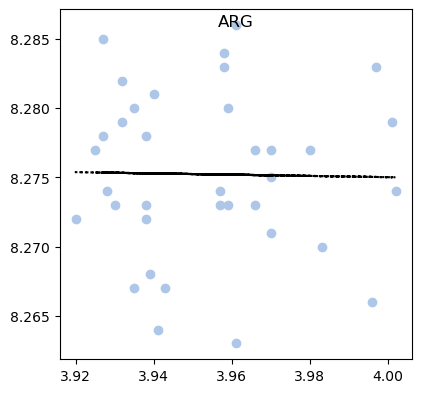

In [57]:
# misnamed!: dirA :: ref (e4, default) -> 2
d2 = from_pickle(dirA.joinpath(ANALYZE_DIR, OUT_FILES.JOB_PKAS.value))
list(d2.items())[:n]

d1 = from_pickle(dirB.joinpath(ANALYZE_DIR, OUT_FILES.JOB_PKAS.value))
list(d1.items())[:n]

matched = match_pkas(d1, d2)
matched

# d2 should b x-axis!
plots.plot_res_analysis(matched)

In [ ]:
matched_df = pkanalysis.matched_pkas_to_df(matched_fp)

d_stats = pkanalysis.matched_pkas_stats(matched_df, subcmd=kind)

In [45]:
cols_pks = matched_df.columns.to_list()[-2:]

[('135L/ARG+A0005_', 8.282, 3.932),
 ('135L/ARG+A0014_', 8.279, 3.932),
 ('135L/ARG+A0021_', 8.272, 3.938),
 ('135L/ARG+A0045_', 8.273, 3.938),
 ('135L/ARG+A0061_', 8.267, 3.943),
 ('135L/ARG+A0068_', 8.278, 3.938),
 ('135L/ARG+A0112_', 8.272, 3.92),
 ('135L/ARG+A0114_', 8.264, 3.941),
 ('135L/ARG+A0125_', 8.274, 3.928),
 ('135L/ARG+A0128_', 8.267, 3.935),
 ('1A2P/ARG+A0059_', 8.285, 3.927),
 ('1A2P/ARG+A0069_', 8.28, 3.959),
 ('1A2P/ARG+A0072_', 8.277, 3.97),
 ('1A2P/ARG+A0083_', 8.273, 3.957),
 ('1A2P/ARG+A0087_', 8.277, 3.925),
 ('1A2P/ARG+A0110_', 8.277, 3.98),
 ('1A2P/ARG+B0059_', 8.281, 3.94),
 ('1A2P/ARG+B0069_', 8.274, 3.957),
 ('1A2P/ARG+B0072_', 8.283, 3.958),
 ('1A2P/ARG+B0083_', 8.273, 3.966),
 ('1A2P/ARG+B0087_', 8.268, 3.939),
 ('1A2P/ARG+B0110_', 8.271, 3.97),
 ('1A2P/ARG+C0059_', 8.278, 3.927),
 ('1A2P/ARG+C0069_', 8.273, 3.959),
 ('1A2P/ARG+C0072_', 8.28, 3.935),
 ('1A2P/ARG+C0083_', 8.275, 3.97),
 ('1A2P/ARG+C0087_', 8.273, 3.93),
 ('1A2P/ARG+C0110_', 8.283, 3.997),
 

---

In [33]:
pkfit_png = comp_dir.joinpath(OUT_FILES.FIG_FIT_ALLPKS.value)
pkfit_png
resfit_png = comp_dir.joinpath(OUT_FILES.FIG_FIT_PER_RES.value)
resfit_png

PosixPath('/home/cat/projects/bench_tests/user_runs/comparison/pkas_fit.png')

PosixPath('/home/cat/projects/bench_tests/user_runs/comparison/res_analysis.png')

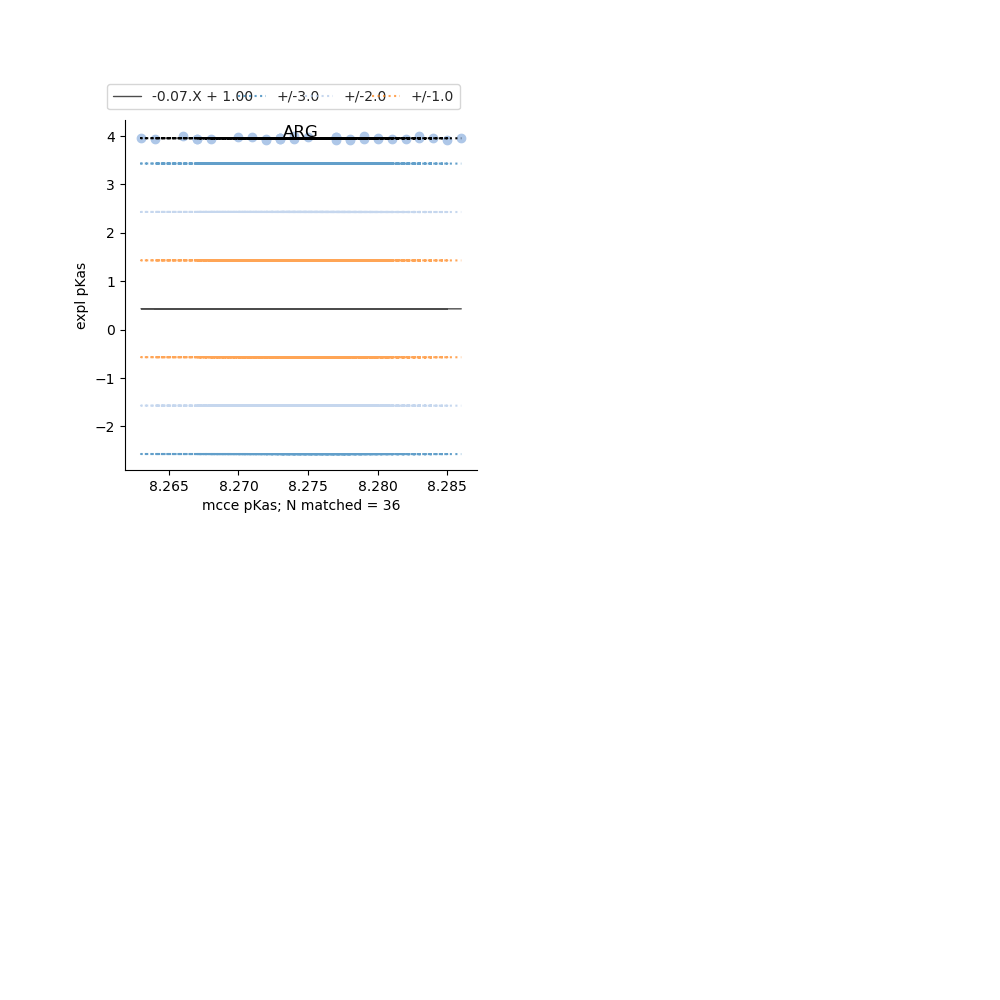

In [34]:
Image(pkfit_png)

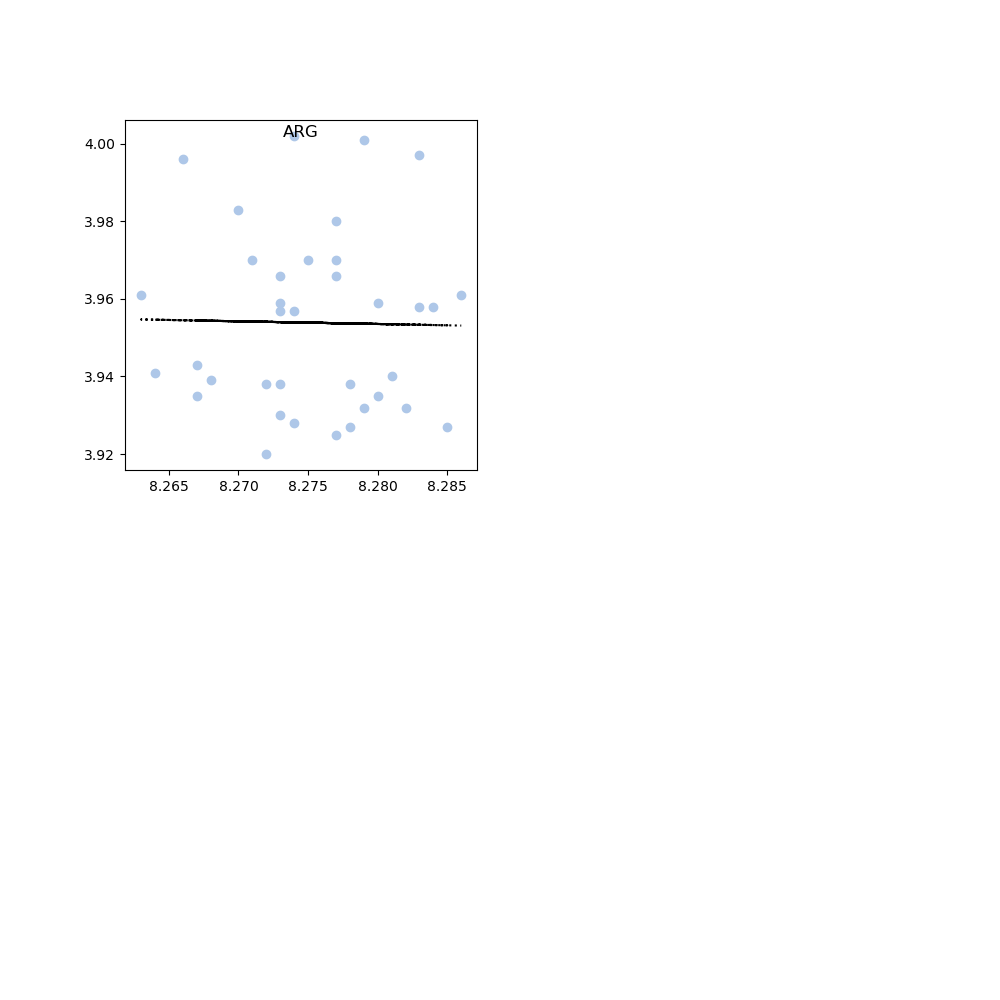

In [35]:
Image(resfit_png)

---

In [76]:
book_fpA = dirA.joinpath(RUNS_DIR, BENCH.Q_BOOK)
book_fpA
n_completeA = len(pkanalysis.get_book_dirs_for_status(book_fpA))
n_completeA

tp_df = pkanalysis.tsv_to_df(confs_tpA)
tput_df = pkanalysis.tsv_to_df(confs_tpA)
plots.plot_conf_thrup(tp_df, n_completeA)

PosixPath('/home/cat/projects/bench_tests/user_runs/updbs_e4/analysis/confs_throughput.tsv')

PosixPath('/home/cat/projects/bench_tests/user_runs/updbs_e4/RUNS/book.txt')

4

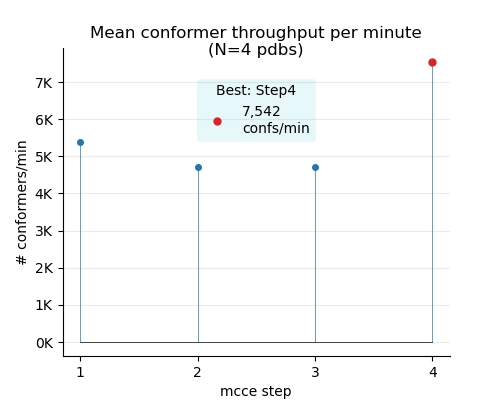

In [39]:
tpA = confs_tpA.parent.joinpath(OUT_FILES.FIG_CONFS_TP.value)
Image(tpA)

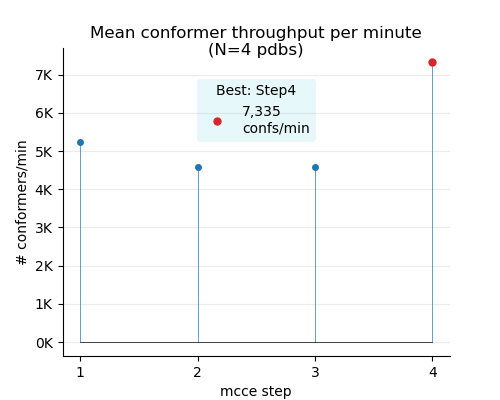

In [40]:
tpB = confs_tpB.parent.joinpath(OUT_FILES.FIG_CONFS_TP.value)
Image(tpB)

In [45]:
matched_fp = benchmarks_dir.joinpath(ANALYZE_DIR, OUT_FILES.MATCHED_PKAS.value)
print(f"{matched_fp = }")

matched_df = pkanalysis.load_matched_pkas(matched_fp)
matched_stats = pkanalysis.matched_pkas_stats(matched_df)
type(matched_stats)
matched_stats

matched_fp = PosixPath('/home/cat/projects/bench_tests/all_pdbs/analysis/matched_pkas.csv')


dict

{'fit': (0.9638685701613313, 1.0),
 'N': 1028,
 'mean_delta': 1.0635564202334629,
 'rmsd': 1.7067523709202879,
 'bounds': [3.0, 2.0, 1.0],
 'report': 'Residues stats:\nNumber of pKas matched with those in pKaDB: 1,028\nFit line: y = 0.96.x + 0.09\nMean delta pKa: 1.06\nRMSD, calculated vs experimental: 1.71\nProportion within 3.0 pH units: 94.55%\nProportion within 2.0 pH units: 88.13%\nProportion within 1.0 pH units: 64.88%\n'}

In [46]:
print(matched_stats["report"])

Residues stats:
Number of pKas matched with those in pKaDB: 1,028
Fit line: y = 0.96.x + 0.09
Mean delta pKa: 1.06
RMSD, calculated vs experimental: 1.71
Proportion within 3.0 pH units: 94.55%
Proportion within 2.0 pH units: 88.13%
Proportion within 1.0 pH units: 64.88%



In [22]:
matched_stats_fp = matched_fp.parent.joinpath(OUT_FILES.MATCHED_PKAS_STATS.value)
dict_to_json(matched_stats, matched_stats_fp)
print(f"{matched_stats_fp = }")

matched_stats_fp = PosixPath('/home/cat/projects/bench_tests/all_pdbs/analysis/matched_pkas_stats.json')


In [24]:
matched_stats_fromjson = json_to_dict(matched_stats_fp)
type(matched_stats_fromjson)

dict

In [35]:
rpt = report_matched_stats(matched_stats)

In [36]:
print(rpt)

Residues statistics:
fit: (0.96, 1.0)
N: 1028
mean_delta: 1.06
rmsd: 1.71
bounds: [3.0, 2.0, 1.0]
txt: Residues stats:
Number of pKas matched with those in pKaDB: 1,028
Fit line: y = 0.96.x + 0.09
Mean delta pKa: 1.06
RMSD, calculated vs experimental: 1.71
Proportion within 3.0 pH units: 94.55%
Proportion within 2.0 pH units: 88.13%
Proportion within 1.0 pH units: 64.88%




---
---
# Refset prep:

---
---

---
# Test cli

In [7]:
from argparse import ArgumentParser, ArgumentError, RawDescriptionHelpFormatter, Namespace as argNamespace
from mcce_benchmark import cli

In [8]:
clilogr = cli.logger
clilogr.hasHandlers()

True

In [9]:
cli_parser = cli.bench_parser()

cli_parser.print_help()

usage: 
bench_setup <+ 1 sub-command: pkdb_pdbs or user_pdbs or launch > <related args>

Examples:
1. pkdb_pdbs: Data & script setup using pkDBv1 pdbs:
   - Minimal input: value for -bench_dir option:
     >bench_setup pkdb_pdbs -bench_dir <folder path>

   - Using non-default option(s) (then job_name is required!):
     >bench_setup pkdb_pdbs -bench_dir <folder path> -d 8 -job_name <job_e8>

2. user_pdbs: Data & script setup using user's pdb list:
   - Minimal input: value for -bench_dir option, -pdb_list:
     >bench_setup user_pdbs -bench_dir <folder path> -pdb_list <path to dir with pdb files OR file listing pdbs paths>

   - Using non-default option(s) (then job_name is required! ):
     >bench_setup user_pdbs -bench_dir <folder path> -pdb_list <path> -d 8 -job_name <job_e8>

3. launch: Launch runs:
   - Minimal input: value for -bench_dir option: IFF no non-default job_name & sentinel_file were passed in pkdb_pdbs
     >bench_setup launch -bench_dir <folder path>

   - Using non-

---
## Test help msg


## cli: None input

In [10]:
cmd = None
cli.bench_cli(cmd)

usage: 
bench_setup <+ 1 sub-command: pkdb_pdbs or user_pdbs or launch > <related args>

Examples:
1. pkdb_pdbs: Data & script setup using pkDBv1 pdbs:
   - Minimal input: value for -bench_dir option:
     >bench_setup pkdb_pdbs -bench_dir <folder path>

   - Using non-default option(s) (then job_name is required!):
     >bench_setup pkdb_pdbs -bench_dir <folder path> -d 8 -job_name <job_e8>

2. user_pdbs: Data & script setup using user's pdb list:
   - Minimal input: value for -bench_dir option, -pdb_list:
     >bench_setup user_pdbs -bench_dir <folder path> -pdb_list <path to dir with pdb files OR file listing pdbs paths>

   - Using non-default option(s) (then job_name is required! ):
     >bench_setup user_pdbs -bench_dir <folder path> -pdb_list <path> -d 8 -job_name <job_e8>

3. launch: Launch runs:
   - Minimal input: value for -bench_dir option: IFF no non-default job_name & sentinel_file were passed in pkdb_pdbs
     >bench_setup launch -bench_dir <folder path>

   - Using non-

AttributeError: 'tuple' object has no attribute 'tb_frame'

In [11]:
cmd = []
cli.bench_cli(cmd)

usage: 
bench_setup <+ 1 sub-command: pkdb_pdbs or user_pdbs or launch > <related args>

Examples:
1. pkdb_pdbs: Data & script setup using pkDBv1 pdbs:
   - Minimal input: value for -bench_dir option:
     >bench_setup pkdb_pdbs -bench_dir <folder path>

   - Using non-default option(s) (then job_name is required!):
     >bench_setup pkdb_pdbs -bench_dir <folder path> -d 8 -job_name <job_e8>

2. user_pdbs: Data & script setup using user's pdb list:
   - Minimal input: value for -bench_dir option, -pdb_list:
     >bench_setup user_pdbs -bench_dir <folder path> -pdb_list <path to dir with pdb files OR file listing pdbs paths>

   - Using non-default option(s) (then job_name is required! ):
     >bench_setup user_pdbs -bench_dir <folder path> -pdb_list <path> -d 8 -job_name <job_e8>

3. launch: Launch runs:
   - Minimal input: value for -bench_dir option: IFF no non-default job_name & sentinel_file were passed in pkdb_pdbs
     >bench_setup launch -bench_dir <folder path>

   - Using non-

SystemExit: 2

/home/cat/miniconda3/envs/mcbtest/lib/python3.11/site-packages/IPython/core/interactiveshell.py:3561: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


## cli: 1 input

In [13]:
cmd = f"{cli.SUB1}".split()
cmd
cli.bench_cli(cmd)

['pkdb_pdbs']

usage: bench_setup <+ 1 sub-command: pkdb_pdbs or user_pdbs or launch > <related args>

Examples:
1. pkdb_pdbs: Data & script setup using pkDBv1 pdbs:
   - Minimal input: value for -bench_dir option:
     >bench_setup pkdb_pdbs -bench_dir <folder path>

   - Using non-default option(s) (then job_name is required!):
     >bench_setup pkdb_pdbs -bench_dir <folder path> -d 8 -job_name <job_e8>

2. user_pdbs: Data & script setup using user's pdb list:
   - Minimal input: value for -bench_dir option, -pdb_list:
     >bench_setup user_pdbs -bench_dir <folder path> -pdb_list <path to dir with pdb files OR file listing pdbs paths>

   - Using non-default option(s) (then job_name is required! ):
     >bench_setup user_pdbs -bench_dir <folder path> -pdb_list <path> -d 8 -job_name <job_e8>

3. launch: Launch runs:
   - Minimal input: value for -bench_dir option: IFF no non-default job_name & sentinel_file were passed in pkdb_pdbs
     >bench_setup launch -bench_dir <folder path>

   - Using non-d

SystemExit: 2

In [14]:
cmd = f"{cli.SUB2}".split() #benchmarks_dir {benchmarks_dir} -job_name {job} -d 8".split()

cli.bench_cli(cmd)

usage: bench_setup <+ 1 sub-command: pkdb_pdbs or user_pdbs or launch > <related args>

Examples:
1. pkdb_pdbs: Data & script setup using pkDBv1 pdbs:
   - Minimal input: value for -bench_dir option:
     >bench_setup pkdb_pdbs -bench_dir <folder path>

   - Using non-default option(s) (then job_name is required!):
     >bench_setup pkdb_pdbs -bench_dir <folder path> -d 8 -job_name <job_e8>

2. user_pdbs: Data & script setup using user's pdb list:
   - Minimal input: value for -bench_dir option, -pdb_list:
     >bench_setup user_pdbs -bench_dir <folder path> -pdb_list <path to dir with pdb files OR file listing pdbs paths>

   - Using non-default option(s) (then job_name is required! ):
     >bench_setup user_pdbs -bench_dir <folder path> -pdb_list <path> -d 8 -job_name <job_e8>

3. launch: Launch runs:
   - Minimal input: value for -bench_dir option: IFF no non-default job_name & sentinel_file were passed in pkdb_pdbs
     >bench_setup launch -bench_dir <folder path>

   - Using non-d

SystemExit: 2

## cli: 2 with help

In [15]:
cmd = f"{cli.SUB1} -h".split() #benchmarks_dir {benchmarks_dir} -job_name {job} -d 8".split()
cmd
#args = cli_parser.parse_args(cmd)

cli.bench_cli(cmd)

['pkdb_pdbs', '-h']

usage: bench_setup <+ 1 sub-command: pkdb_pdbs or user_pdbs or launch > <related args>

Examples:
1. pkdb_pdbs: Data & script setup using pkDBv1 pdbs:
   - Minimal input: value for -bench_dir option:
     >bench_setup pkdb_pdbs -bench_dir <folder path>

   - Using non-default option(s) (then job_name is required!):
     >bench_setup pkdb_pdbs -bench_dir <folder path> -d 8 -job_name <job_e8>

2. user_pdbs: Data & script setup using user's pdb list:
   - Minimal input: value for -bench_dir option, -pdb_list:
     >bench_setup user_pdbs -bench_dir <folder path> -pdb_list <path to dir with pdb files OR file listing pdbs paths>

   - Using non-default option(s) (then job_name is required! ):
     >bench_setup user_pdbs -bench_dir <folder path> -pdb_list <path> -d 8 -job_name <job_e8>

3. launch: Launch runs:
   - Minimal input: value for -bench_dir option: IFF no non-default job_name & sentinel_file were passed in pkdb_pdbs
     >bench_setup launch -bench_dir <folder path>

   - Using non-d

SystemExit: 0

## cli: setup with n_pdbs

In [17]:
from mcce_benchmark import custom_sh

In [26]:
ben_dir = "../foo_dir"
cmd = f"{cli.SUB1} -bench_dir {ben_dir} -n_pdbs 2".split() # -job_name {job} -d 8".split()
cmd
args = cli_parser.parse_args(cmd)

all_default = custom_sh.all_opts_are_defaults(args)
all_default

cli.bench_cli(cmd)

['pkdb_pdbs', '-bench_dir', '../foo_dir', '-n_pdbs', '2']

True

In [25]:
args

# holds mcce options only
d_sh_args = custom_sh.cli_args_to_dict(args)

d_sh_args

is_default = True
for opt in d_sh_args:
    is_default = (is_default
                  and d_sh_args[opt] == custom_sh.all_default_opts.get(opt)
    )
    if not is_default:  # done
        print("False at:", opt)
        break

Namespace(subparser_name='pkdb_pdbs', job_name='default_run', sentinel_file='pK.out', wet=False, noter=False, u='', s1_norun=False, s2_norun=False, s3_norun=False, s4_norun=False, d=4.0, conf_making_level=1, c=[1, 99999], x='delphi', f='/tmp', p=1, r=False, titr_type='ph', i=0.0, interval=1.0, n=15, ms=False, launch=False, bench_dir=PosixPath('/home/cat/projects/MCCE_Benchmarking/foo_dir'), n_pdbs=2, func=<function bench_job_setup at 0x7f0e4200af20>)

{'wet': False,
 'noter': False,
 'u': '',
 's1_norun': False,
 's2_norun': False,
 's3_norun': False,
 's4_norun': False,
 'd': 4.0,
 'conf_making_level': 1,
 'c': [1, 99999],
 'x': 'delphi',
 'f': '/tmp',
 'p': 1,
 'r': False,
 'titr_type': 'ph',
 'i': 0.0,
 'interval': 1.0,
 'n': 15,
 'ms': False,
 'launch': False}

False at: launch


In [138]:
cmd = f"{cli.SUB2} -bench_dir {ben_dir}".split()
cmd

cli.bench_cli(cmd)

['launch_job', '-benchmarks_dir', '../foo_dir']

[INFO]: mcce_benchmark.cli, bench_launch_batch:
	bench_expl_pkas args:
{'subparser_name': 'launch_job',
 'benchmarks_dir': PosixPath('/home/cat/projects/MCCE_Benchmarking/notebooks/foo_dir'),
 'job_name': 'default_run',
 'n_active': 10,
 'sentinel_file': 'pK.out',
 'func': <function mcce_benchmark.cli.bench_launch_batch(args: argparse.Namespace) -> None>}

[INFO]: mcce_benchmark.cli, bench_launch_batch:
	Script contents prior to launch:
#!/bin/bash

step1.py --dry prot.pdb
step2.py -d 4
step3.py -d 4
step4.py --xts

sleep 10

[INFO]: mcce_benchmark.cli, bench_launch_batch:
	Submiting batch of jobs.
[INFO]: mcce_benchmark.scheduling, create_cron_sh:
	Created script for crontab 'crontab_default_run_sh' in /home/cat/projects/MCCE_Benchmarking/notebooks/foo_dir

[INFO]: mcce_benchmark.scheduling, schedule_job:
	Created the bash script for crontab.
[INFO]: mcce_benchmark.scheduling, create_crontab:
	Crontab text:
#Scheduled from bench_launchjob
* * * * * /home/cat/projects/MCCE_Benchmarking

---
## Scheduling

In [141]:
from mcce_benchmark import scheduling

[INFO]: mcce_benchmark.cli, <module>:
	
START
----------------------------------------------------------------------
2024-02-28 13:41:41 - USER = 'cat' - User envir: mce
APP VER: (0, 1, 0, 'dev5', 'g2095b87.d20240226')
APP DEFAULTS:
Globals: MCCE_EPS = 4; N_ACTIVE = 10
Default resource names:
DEFAULT_DIR = 'mcce_benchmarks' : default benchmarking folder name
BENCH.CLEAN_PDBS = 'clean_pdbs' : fixed
BENCH.Q_BOOK = 'book.txt' : jobs bookkeeping file
BENCH.DEFAULT_JOB = 'default_run' (-> default_run.sh script in clean_pdbs/)
BENCH.BENCH_PARSE_E4 = PosixPath('/home/cat/projects/MCCE_Benchmarking/mcce_benchmark/data/refsets/parse.e4') : Current reference set
N_PDBS = 120 : number of pdbs in the dataset
Default analysis output file names (fixed):
OUT_FILES.MATCHED_PKAS_FILE.name = 'MATCHED_PKAS_FILE'
OUT_FILES.ALL_PKAS_FILE.name = 'ALL_PKAS_FILE'
OUT_FILES.CONF_COUNTS.name = 'CONF_COUNTS'
OUT_FILES.RES_COUNTS.name = 'RES_COUNTS'
OUT_FILES.RUN_TIMES.name = 'RUN_TIMES'
OUT_FILES.CONFS_PER_RES.n

In [100]:
fdir(scheduling)

['CONDA_PATH',
 'CRON_COMMENT',
 'CRON_SH_PREFIX',
 'CronTab',
 'ENTRY_POINTS',
 'Path',
 'Pathok',
 'USER',
 'USER_ENV',
 'USER_PRFX',
 'Union',
 'argNamespace',
 'create_cron_sh',
 'create_crontab',
 'create_crontab_old',
 'logger',
 'logging',
 'make_executable',
 'schedule_job',
 'shutil',
 'subprocess',
 'subprocess_run',
 'sys']

In [103]:
USER_PRFX, USER_ENV, CONDA_PATH
ENTRY_POINTS["launch"]
benchmarks_dir

('/home/cat/miniconda3/envs/mce', 'mce', '/home/cat/miniconda3/condabin/conda')

'mccebench_launchjob'

PosixPath('/home/cat/projects/mcce_benchmarks_test')

In [ ]:
cron_txt = scheduling.create_single_crontab( benchmarks_dir, job, debug=True)
print(cron_txt)

---
# Test cli

In [ ]:
logger = logging.getLogger()

In [242]:
job = "norun_foo"
custom_sh.write_run_script_from_template(benchmarks_dir, job,
                                                    script_template = ScriptChoices.NORUN,
                                                    job_args = None)
sh_path = benchmarks_dir.joinpath(BENCH.CLEAN_PDBS, f"{job}.sh")
sh_path.exists()
sh_path
!cat {sh_path}

True

PosixPath('/home/cat/projects/mcce_benchmarks_test/clean_pdbs/norun_foo.sh')


#!/bin/bash

step1.py prot.pdb --norun


In [231]:
!cat {sh_path}


 #!/bin/bash

 step1.py prot.pdb --dry -d 8.0
 step2.py -d 8.0
 step3.py -d 8.0
 step4.py --xts 

 sleep 10


In [126]:
use_default_script = check_steps_opt_defaults(args)
use_default_script

True

In [205]:
out = populate_custom_template(args)
print(out)



 #!/bin/bash

 step1.py prot.pdb --dry -d 8.0
 step2.py -d 8.0
 step3.py -d 8.0
 step4.py --xts 

 sleep 10

